In [3]:
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib notebook
import os
import scipy.optimize as optimize
import scipy.integrate as integrate
import scipy.fftpack as fft
import scipy.interpolate as interp
from scipy import stats
import re
from matplotlib.patches import Rectangle
import matplotlib.cm as cm
import matplotlib.colors as colors
import spyview_data_import as data_import

e = 1.602176565e-19; #electron charge [C]
k_B = 1.3806488e-23;  #Boltzmann constant [J/K]
hbar = 1.0545718e-34; #reduced Planck constant [Js]
h = 6.626070040e-34 #Planck constant [Js]
G0 = 2*e**2/h #conductance quantum [S]
me = 9.10938215e-31 #electron mass [kg]

ModuleNotFoundError: No module named 'spyview_data_import'

In [2]:
def doubleYAxisPlot(axLeft, x, yLeft, yRight, xLabel, yLabelLeft, yLabelRight):
    axRight = axLeft.twinx() # this creates another axes object that shares the same x axis and whose y ticks and labels are automatically set to be on the right
    plot_left, = axLeft.plot(x, yLeft, color='#1f77b4') # these are the default colors in matplotlib v2
    plot_right, = axRight.plot(x, yRight, color='#ff7f0e')
    axLeft.set_ylabel(yLabelLeft, color=plot_left.get_color())
    axRight.set_ylabel(yLabelRight, color=plot_right.get_color())
    axLeft.set_xlabel(xLabel)
    # set all tick labels, tick lines and spines to the same color as the plot line
    for t in axLeft.get_yticklabels(): 
        t.set_color(plot_left.get_color())
    for t in axLeft.get_yticklines():
        t.set_color(plot_left.get_color())
    for t in axRight.get_yticklabels():
        t.set_color(plot_right.get_color())
    for t in axRight.get_yticklines():
        t.set_color(plot_right.get_color())
    axLeft.spines['left'].set_color(plot_left.get_color())
    axRight.spines['right'].set_color(plot_right.get_color())
    return (axLeft, axRight)

In [3]:
directory = "/Users/wgz/OneDrive/Experiments/InAs SAG/Data/20171118_InAsSAG_Q0015I4"
data_file_list = [] # a list that contains all the names of the .dat files under "directory"
settings_file_list = [] # a list that contains all the names of the .set files under "directory"
gate_gain = 15
gate = 'dac3'
gate_settings = []
slope=[]
offset=[]
slope_std=[]
err_offset=[]

# create the lists of all .dat and .set files in the directory
for file in os.listdir(directory):
    if '.dat' in file:
        data_file_list.append(file)
        
    if '.set' in file:
        settings_file_list.append(file)
        
#print(settings_file_list)

<IPython.core.display.Javascript object>


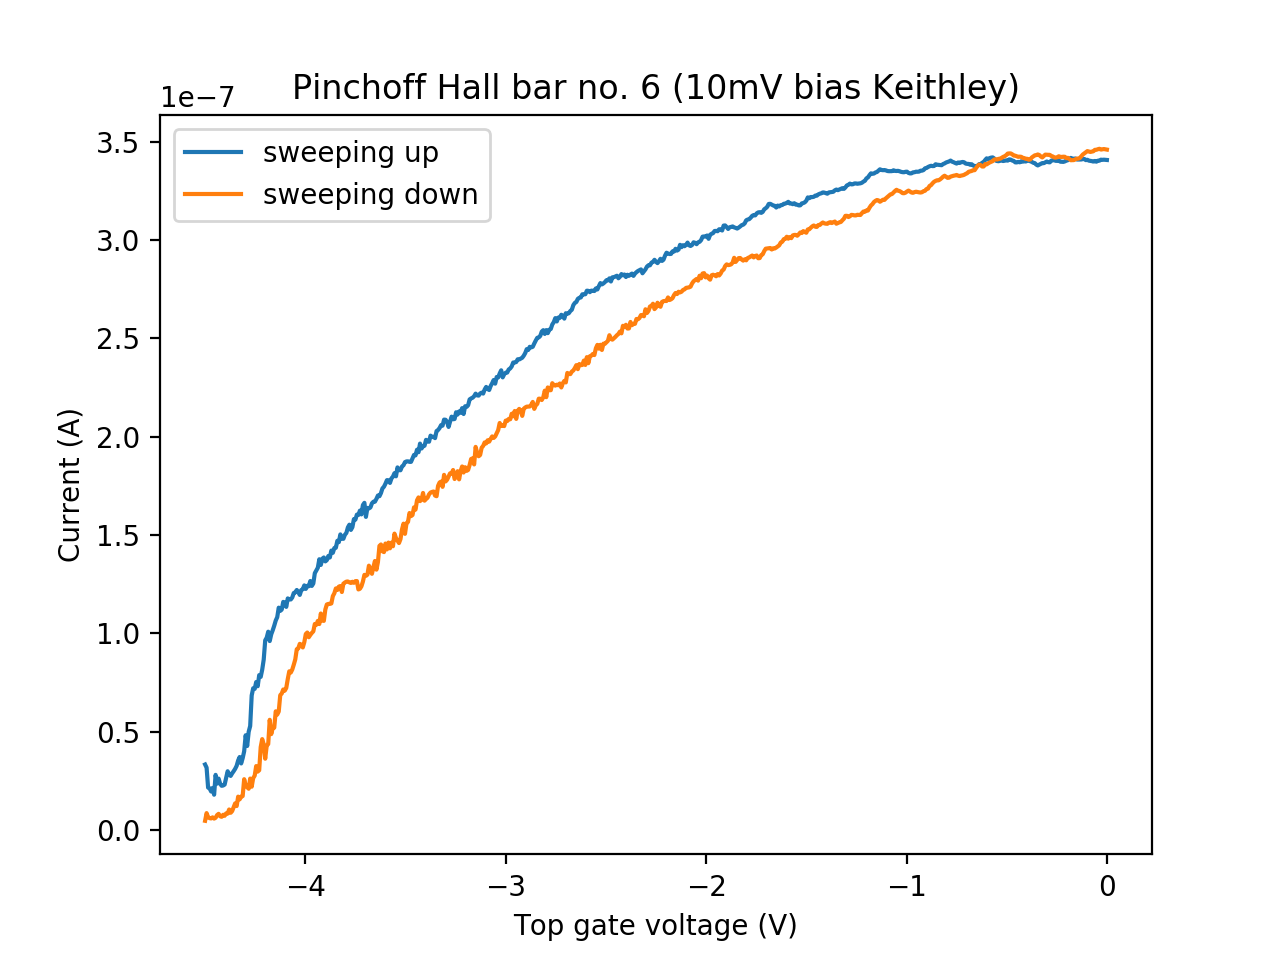

In [4]:
# importing a 1D scan file
#setting_filename = settings_file_list[2]
setting_filename = "H6_SD_pinchoff_10mVbias_1.set"
settings = data_import.read_file(setting_filename,directory)
#data_filename = data_file_list[3]
data_filename = "H6_SD_pinchoff_10mVbias_1.dat"
keithley_pinchoff_data_down = data_import.data_array_1D(data_filename, directory, column=6, gain1=0.015, gain2=1)

setting_filename = "H6_SD_pinchoff_10mVbias_2.set"
settings = data_import.read_file(setting_filename,directory)
data_filename = "H6_SD_pinchoff_10mVbias_2.dat"
keithley_pinchoff_data_up = data_import.data_array_1D(data_filename, directory, column=6, gain1=0.015, gain2=1)
# gain1: 15V/V; gain 2: 1 (unit: A)

plt.figure(1)
plt.plot(keithley_pinchoff_data_up[:,0], keithley_pinchoff_data_up[:,1], label='sweeping up')
plt.plot(keithley_pinchoff_data_down[:,0], keithley_pinchoff_data_down[:,1], label='sweeping down')
plt.xlabel('Top gate voltage (V)')
plt.ylabel('Current (A)')
plt.title('Pinchoff Hall bar no. 6 (10mV bias Keithley)')
plt.legend()
plt.savefig('H6 pinchoff.pdf', format='pdf')

(201, 201)
(201, 201)


<IPython.core.display.Javascript object>


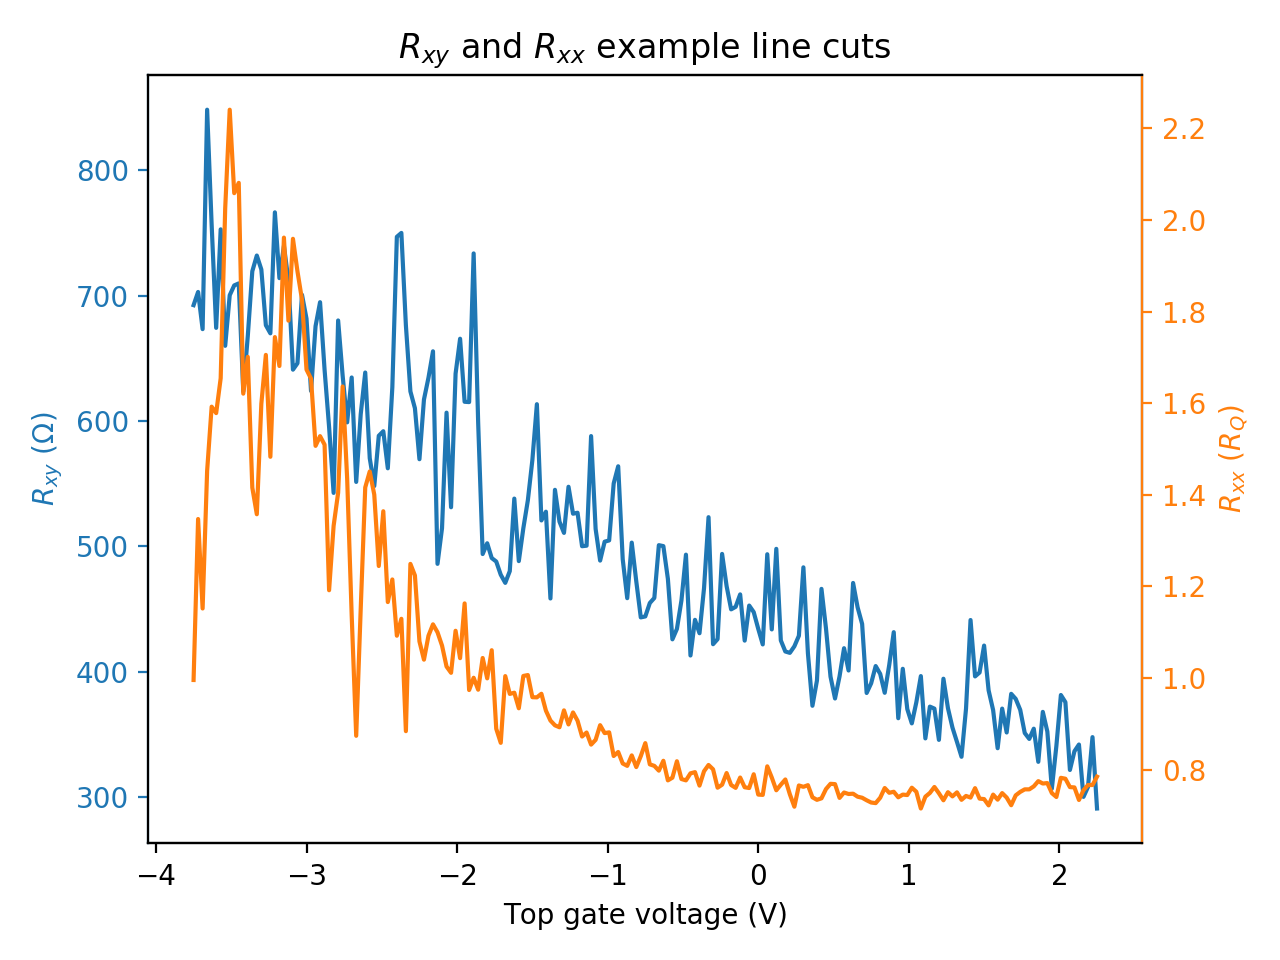

Text(0.5,1,'$R_{xy}$ and $R_{xx}$ example line cuts')

In [6]:
#importing a 2D scan and showing a linecut
data_filename_2D = "H6_TG_B_Hall_10nAbias_large_range_3.dat"
get_data_2D_Rxy = data_import.data_array_2D(data_filename_2D, directory, 6,0.015,1,1)
#gain1=0.015 (15V/V bias， inner loop, Y coordinates), gain2=1 (unit: Tesla, outer loop, X coordinates), gain3=1 (unit: Ohm)
B_Xcoord = get_data_2D_Rxy[0,1:] # this is the X axis
TG_Ycoord = get_data_2D_Rxy[1:,0] # this is the Y axis
values_Rxy = (get_data_2D_Rxy[1:,1:]-np.fliplr(get_data_2D_Rxy[1:,1:]))/2 # asymmetrize the transverse voltage
print(values_Rxy.shape)

get_data_2D_Rxx = data_import.data_array_2D(data_filename_2D, directory, 7,0.015,1,1)
#gain1=0.015 (15V/V bias), gain2=1 (unit: Tesla), gain3=1 (unit: Ohm)
values_Rxx = (get_data_2D_Rxx[1:,1:] + np.fliplr(get_data_2D_Rxx[1:,1:]))/2 # symmetrize the longitudinal voltage
print(values_Rxx.shape)

plt.rcParams.update({'figure.autolayout': True}) # make sure enough space is left at the boundaries to display all labels
fig_linecut_check = plt.figure(2)
ax_Rxy = fig_linecut_check.add_subplot(111)
(ax_Rxy, ax_Rxx) = doubleYAxisPlot(axLeft=ax_Rxy, \
                                   x=TG_Ycoord, yLeft=values_Rxy[:,20], yRight=values_Rxx[:,20]/12906, \
                                   xLabel='Top gate voltage (V)', \
                                   yLabelLeft='$R_{xy}$ ($\Omega$)',\
                                   yLabelRight='$R_{xx}$ ($R_Q$)')
ax_Rxy.set_title('$R_{xy}$ and $R_{xx}$ example line cuts')

<IPython.core.display.Javascript object>


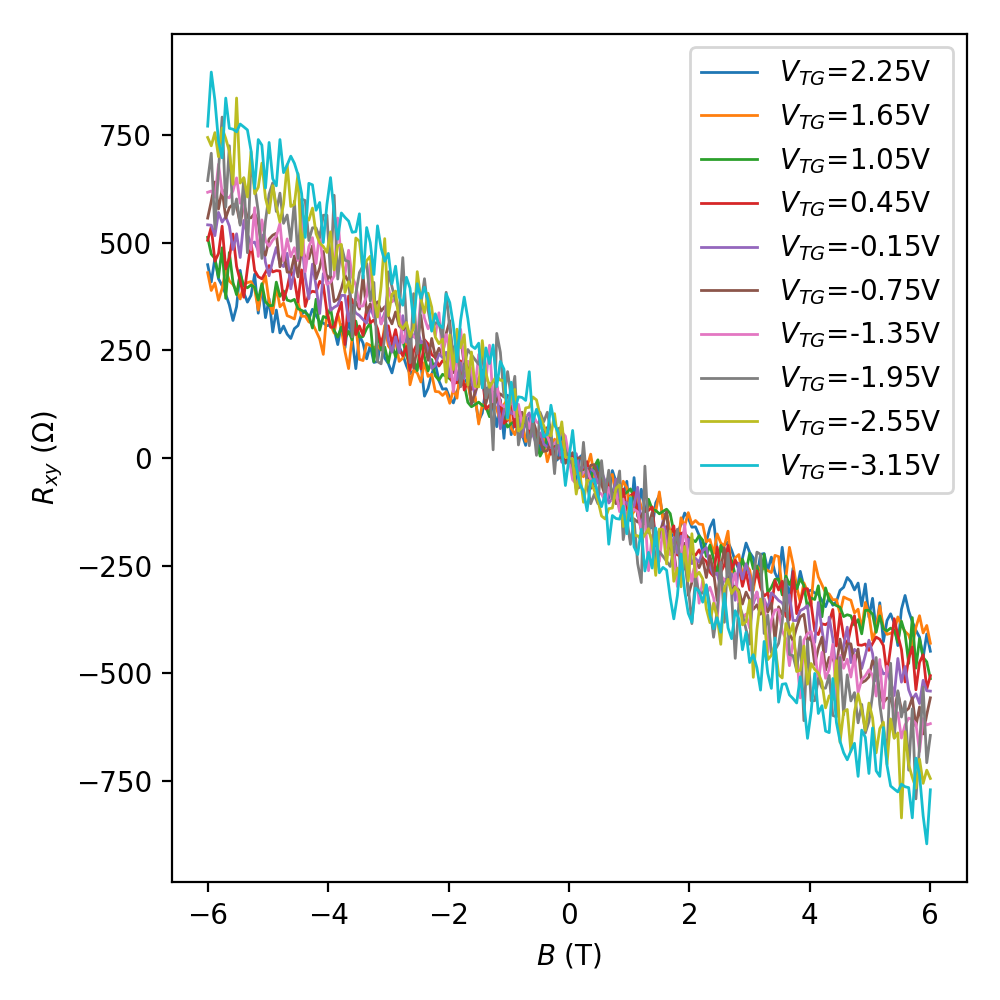

In [7]:
plt.rcParams.update({'figure.autolayout': True}) # make sure enough space is left at the boundaries to display all labels
fig_Rxy_vs_B = plt.figure(num=8, figsize=(5,5))
ax_Rxy_vs_B = fig_Rxy_vs_B.add_subplot(111)
number_of_lines = 10
for i in range(0,number_of_lines):
    ax_Rxy_vs_B.plot(B_Xcoord, values_Rxy[int(i*200/number_of_lines),:], linewidth=1, label='$V_{TG}$='+str(TG_Ycoord[int(i*200/number_of_lines)])+'V')
#ax_Rxy_vs_B.set_ylim([-800,600])
ax_Rxy_vs_B.set_xlabel('$B$ (T)')
ax_Rxy_vs_B.set_ylabel('$R_{xy}$ ($\Omega$)')
ax_Rxy_vs_B.legend()
#fig_Rxy_vs_B.savefig('H6 B linecuts.pdf', format='pdf')

<IPython.core.display.Javascript object>


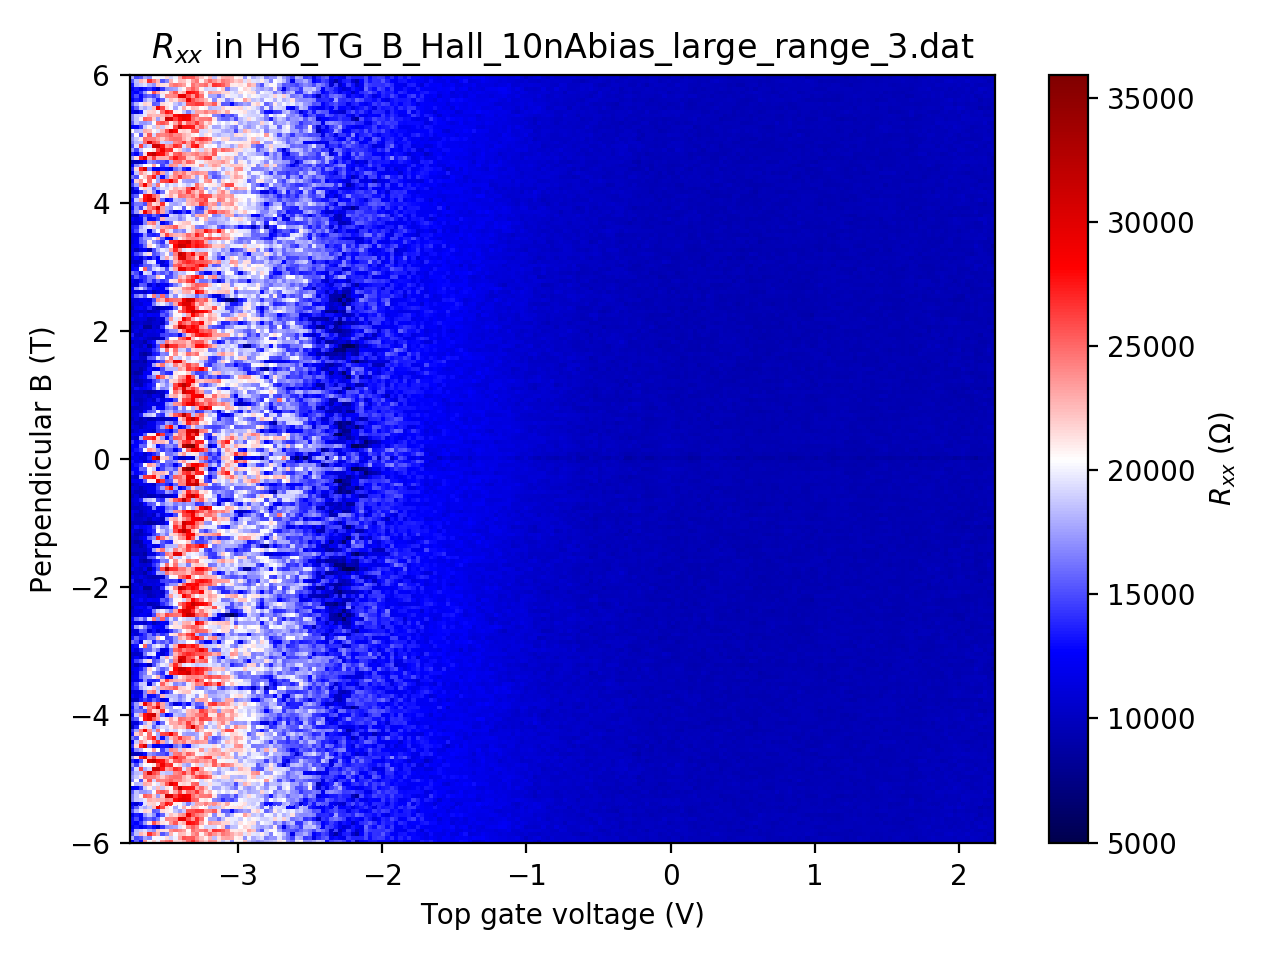

Text(0.5,1,'$R_{xx}$ in H6_TG_B_Hall_10nAbias_large_range_3.dat')

In [8]:
# showing a 2D plot of the 2D scan imported above
plt.figure(3)
twoDmap_Rxx = plt.pcolor(TG_Ycoord, B_Xcoord, values_Rxx.transpose(), cmap=cm.get_cmap('seismic'))
#norm=colors.PowerNorm(gamma=0.4, vmin=0, vmax=2.4))
cb=plt.colorbar(twoDmap_Rxx)
cb.set_label('$R_{xx}$ ($\Omega$)')
plt.xlim(TG_Ycoord[-1], TG_Ycoord[0])
plt.ylim(B_Xcoord[0], B_Xcoord[-1])
plt.xlabel('Top gate voltage (V)')
plt.ylabel('Perpendicular B (T)')
plt.title('$R_{xx}$ in ' + data_filename_2D)
#plt.savefig('H6 Rxx raw.pdf', format='pdf')

<IPython.core.display.Javascript object>


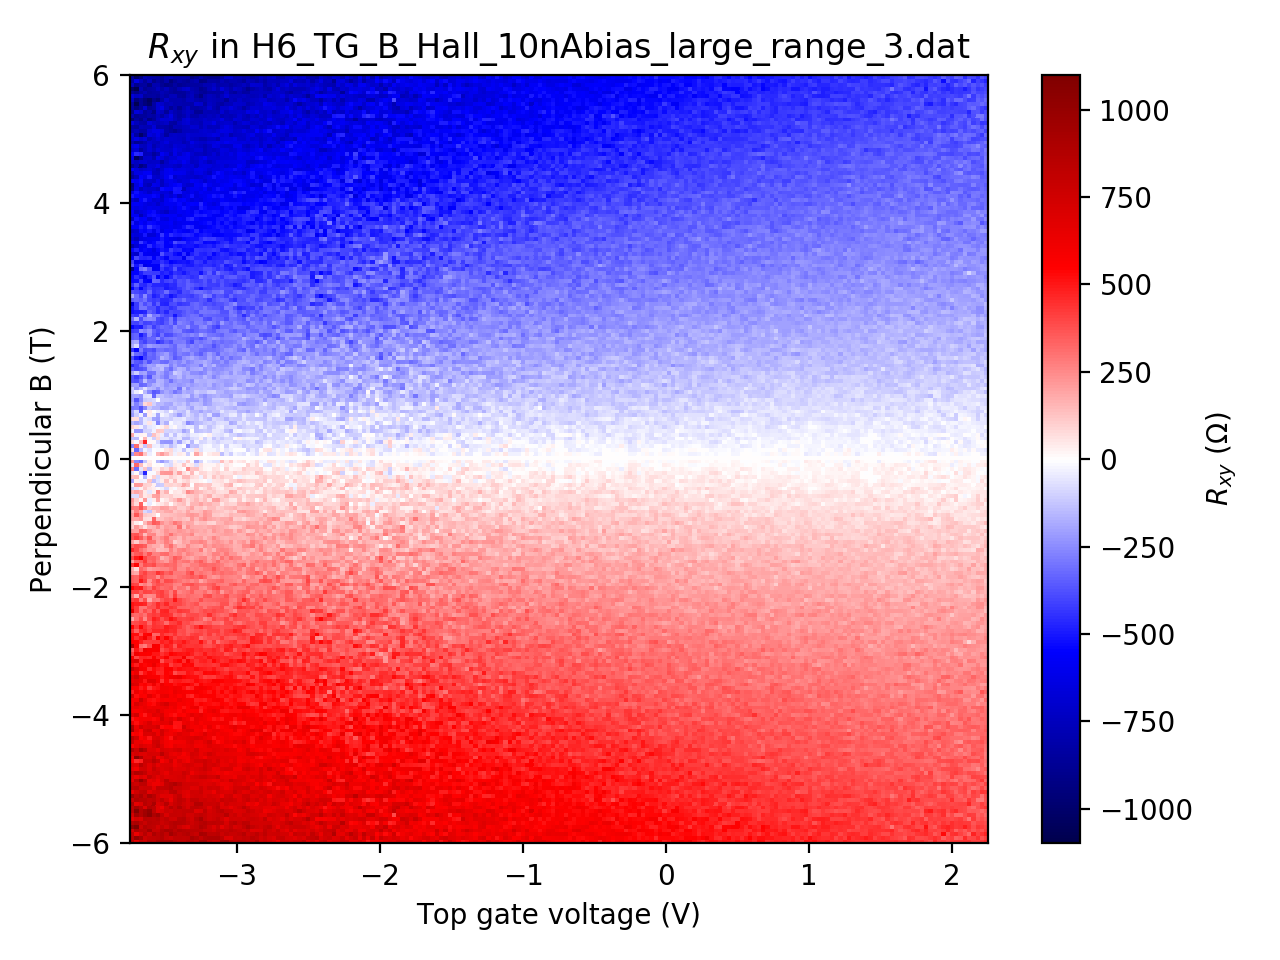

Text(0.5,1,'$R_{xy}$ in H6_TG_B_Hall_10nAbias_large_range_3.dat')

In [9]:
# showing a 2D plot of the 2D scan imported above
plt.figure(4)
twoDmap = plt.pcolor(TG_Ycoord, B_Xcoord, values_Rxy.transpose(), cmap=cm.get_cmap('seismic'))
#norm=colors.PowerNorm(gamma=0.4, vmin=0, vmax=2.4))
cb=plt.colorbar(twoDmap)
cb.set_label('$R_{xy}$ ($\Omega$)')
plt.xlim(TG_Ycoord[-1], TG_Ycoord[0])
plt.ylim(B_Xcoord[0], B_Xcoord[-1])
plt.xlabel('Top gate voltage (V)')
plt.ylabel('Perpendicular B (T)')
plt.title('$R_{xy}$ in ' + data_filename_2D)
#plt.savefig('H6 Rxy raw.pdf', format='pdf')

## Some basic Hall effect formulas

Links: [Hall effect](https://en.wikipedia.org/wiki/Hall_effect) and [mobility](https://en.wikipedia.org/wiki/Electron_mobility) Wikipedia pages.

$$ V_H = \frac{I_x B_z}{nte} $$

where $V_H$ is the Hall voltage, $I_x$ the current, $B_z$ perpendicular magnetic field, $n$ carrier density, $t$ thickness (height) of the wire and $e$ the electron charge. In our measurements, $R_{xy} \equiv V_H/I_x$, so fitting $R_{xy}$ and $B_z$ at any given $V_{TG}$ gives the coefficient $1/(nte)$.

From $\sigma = ne\mu$, we have $\mu=\sigma/(ne)$ where $\mu$ is the carrier (electron) mobility and $\sigma$ the conductivity.

To translate this into what we measure directly, 

$$\mu = \sigma t \frac{1}{nte} = \frac{L_{xx}}{R_{xx}W} \frac{1}{nte}$$

$1/(\sigma t)$ is also called the sheet resistance and obtained in our measurements as 

$$\sigma t = \frac{1}{R_{xx}} \frac{L_{xx}}{W}$$

where $R_{xx}$ is the longitudinal resistance via current-bias four-probe measurements, $L_{xx}$ is the distance between two XX leads (`length_xx` defined below) and $W$ the width of the nanowire.

So we first fit the linear coefficient $1/(nte)$ and then directly calculate $n$ and $\mu$ from it.

(201,)


<IPython.core.display.Javascript object>


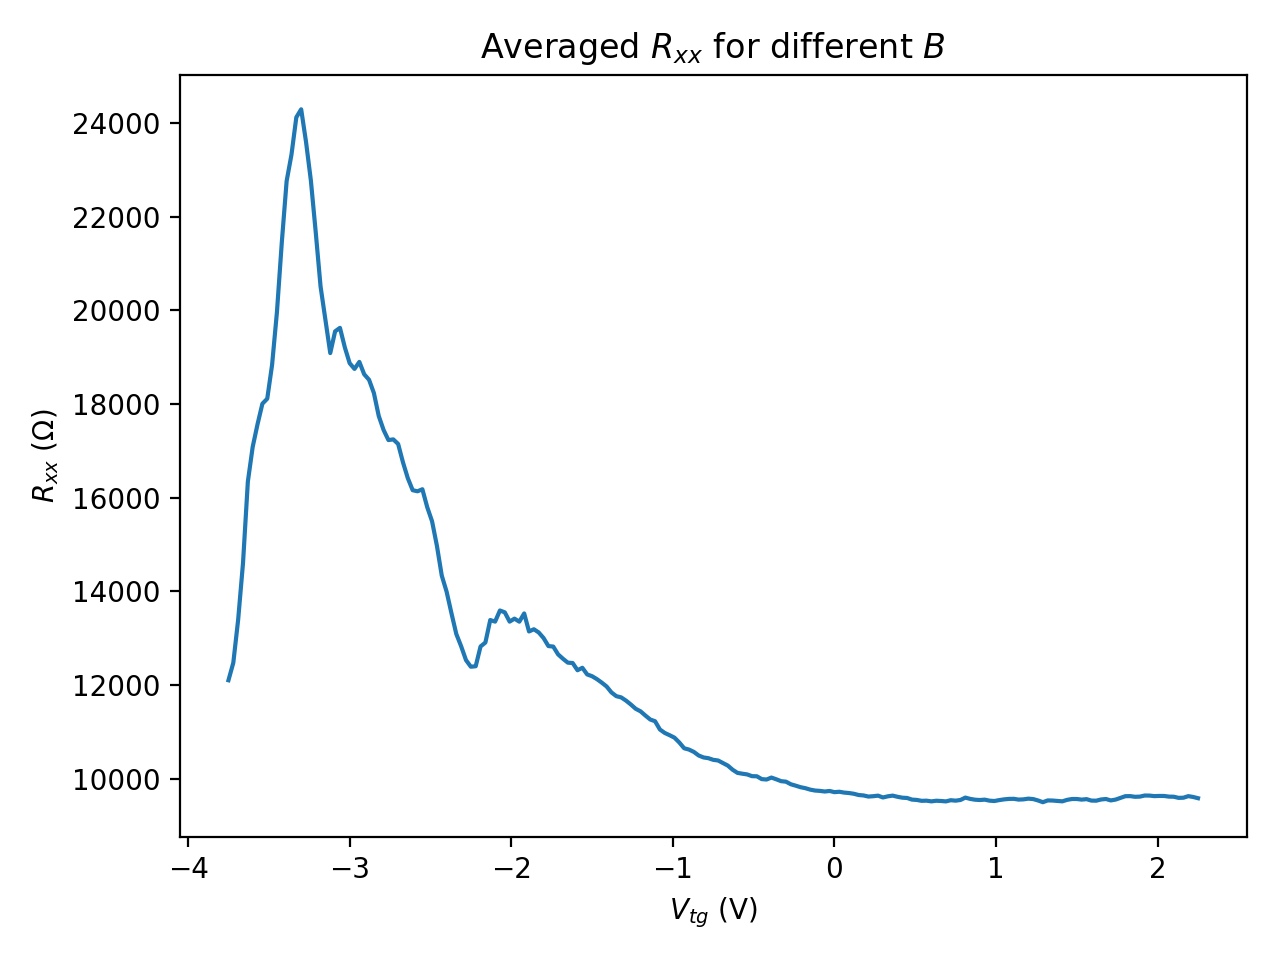

Text(0,0.5,'$R_{xx}$ ($\\Omega$)')

In [10]:
# Since we are only going to obtain one slope for each V_tg anyway, let's average Rxx over different B's 
Rxx_average_each_gate = values_Rxx.mean(axis=1)
print(Rxx_average_each_gate.shape)
plt.figure(5)
plt.plot(TG_Ycoord, Rxx_average_each_gate)
plt.title('Averaged $R_{xx}$ for different $B$')
plt.xlabel('$V_{tg}$ (V)')
plt.ylabel('$R_{xx}$ ($\Omega$)')

In [11]:
# Here begins data processing, finally...

# First, define device geometry
# Length units: m
width_wire = 140e-9
#width_wire = 140e-9*2+100e-9
height_wire = 100e-9 # or "thickness", in usual 2D Hall language
#height_wire = 10e-9 # or "thickness", in usual 2D Hall language
length_SD = 6.86e-6 # length from source to drain
length_xx = 3e-6 # length between two xx leads (L1 and L2 in this case)

# calculate (the inverse of) the sheet resistance at each gate value
sigma_t = length_xx / (width_wire * Rxx_average_each_gate)

<IPython.core.display.Javascript object>


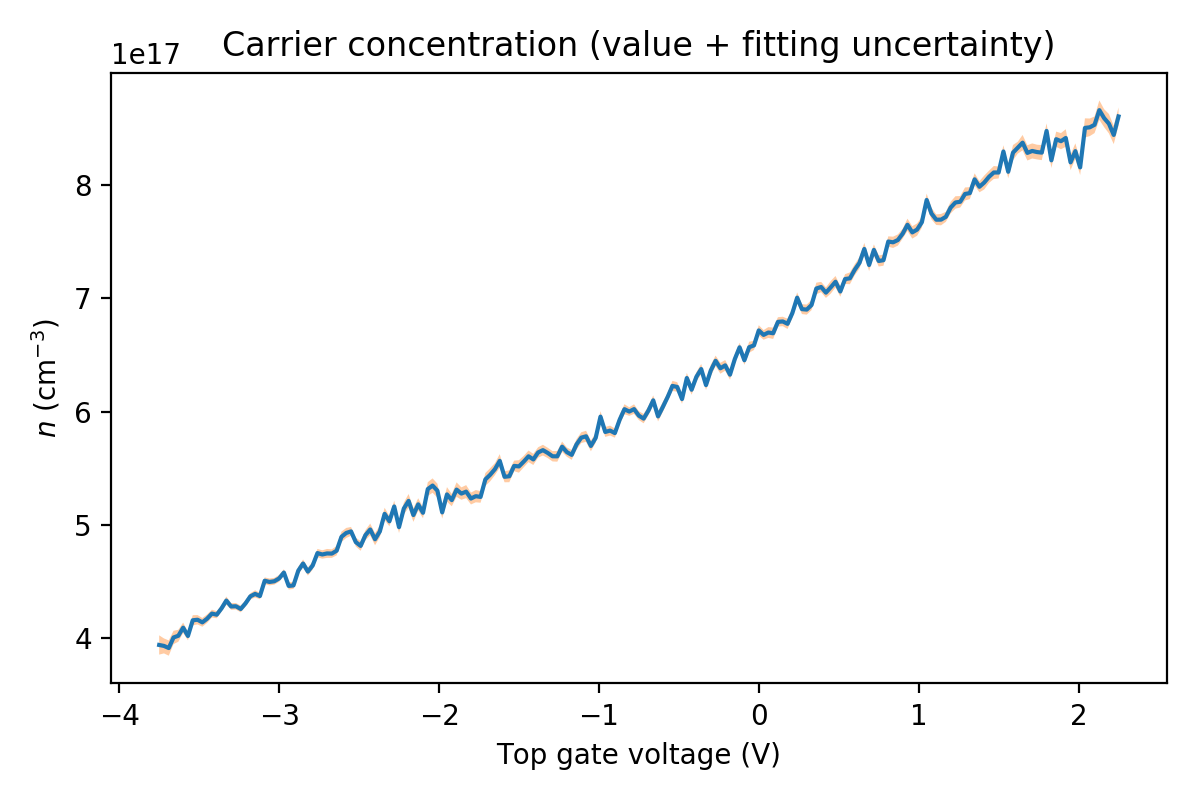

Text(0.5,1,'Carrier concentration (value + fitting uncertainty)')

In [12]:
# fit the coefficient 1/nte

nte_inverse = np.empty_like(TG_Ycoord) # initializing the vector containing the 1/nte coefficients for each TG value
nte_fit_std_err = np.empty_like(TG_Ycoord)
for i in range(0,TG_Ycoord.size):
    nte_inverse[i], intercept, r_value, p_value, nte_fit_std_err[i] = stats.linregress(B_Xcoord,values_Rxy[i,:])

concentration = np.abs(1e-6/(nte_inverse*e*height_wire))
conc_error = nte_fit_std_err * (1e-6/(e*height_wire)) * np.abs(np.power(nte_inverse, -2))
plt.figure(num=6, figsize=(6,4))
plt.plot(TG_Ycoord, concentration) # 1e-6 converts units from m^3 to cm^3
plt.fill_between(TG_Ycoord, concentration-conc_error, concentration+conc_error, alpha=0.5, facecolor='#FF9848')
plt.xlabel('Top gate voltage (V)')
plt.ylabel('$n$ (cm$^{-3}$)')
plt.title('Carrier concentration (value + fitting uncertainty)')
#plt.savefig('H6 concentration.pdf', format='pdf')

<IPython.core.display.Javascript object>


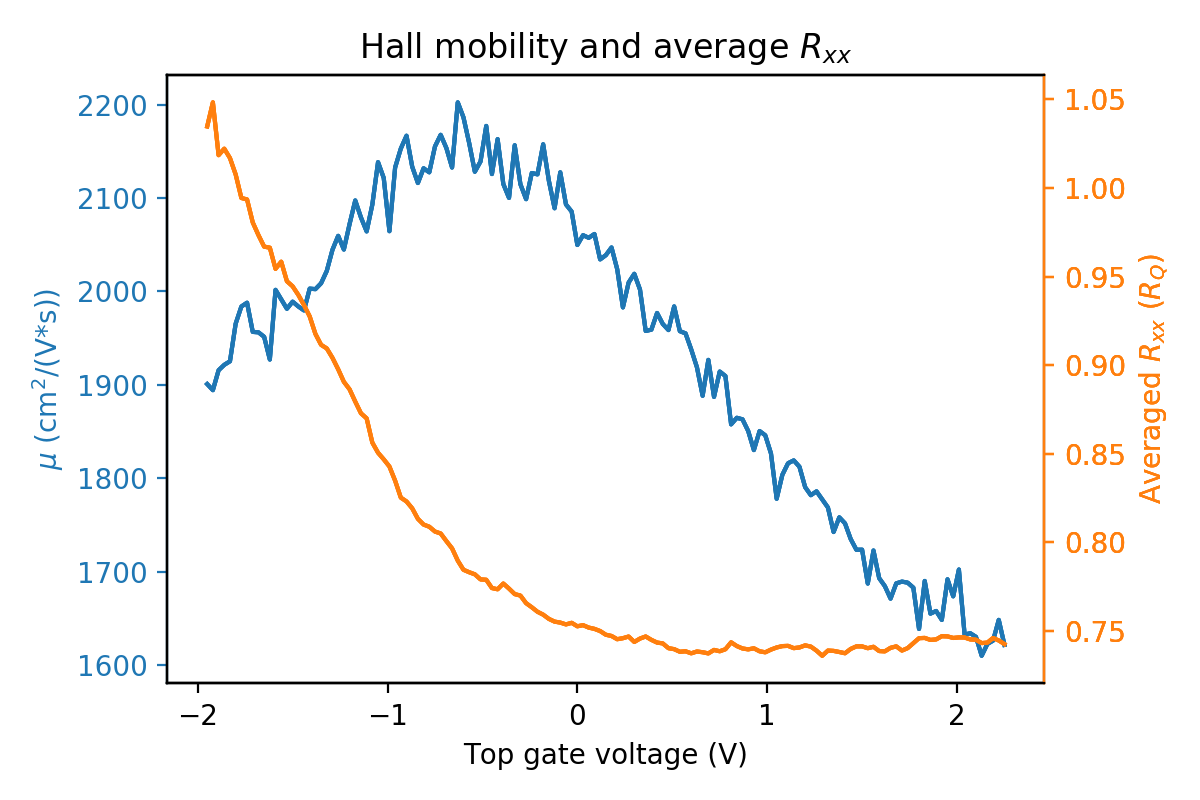

Text(0.5,1,'Hall mobility and average $R_{xx}$')

In [13]:
mu = np.abs(sigma_t * nte_inverse)*1e4

cut_neg_gates = 60 # number of columns of gate values to cut from the plots, 1 = no cutting
plt.rcParams.update({'figure.autolayout': True}) # make sure enough space is left at the boundaries to display all labels
fig_mob = plt.figure(num=7, figsize=(6,4))
ax_mob = fig_mob.add_subplot(111)
(ax_mob, ax_Rxx_average) = doubleYAxisPlot(axLeft=ax_mob, \
                                   x=TG_Ycoord[:-cut_neg_gates], yLeft=mu[:-cut_neg_gates], yRight=Rxx_average_each_gate[:-cut_neg_gates]/12906, \
                                   xLabel='Top gate voltage (V)', \
                                   yLabelLeft='$\mu$ (cm$^2$/(V*s))',\
                                   yLabelRight='Averaged $R_{xx}$ ($R_Q$)')
ax_mob.set_title('Hall mobility and average $R_{xx}$')
#fig_mob.savefig('H6 Hall mob.pdf', format='pdf')

<IPython.core.display.Javascript object>


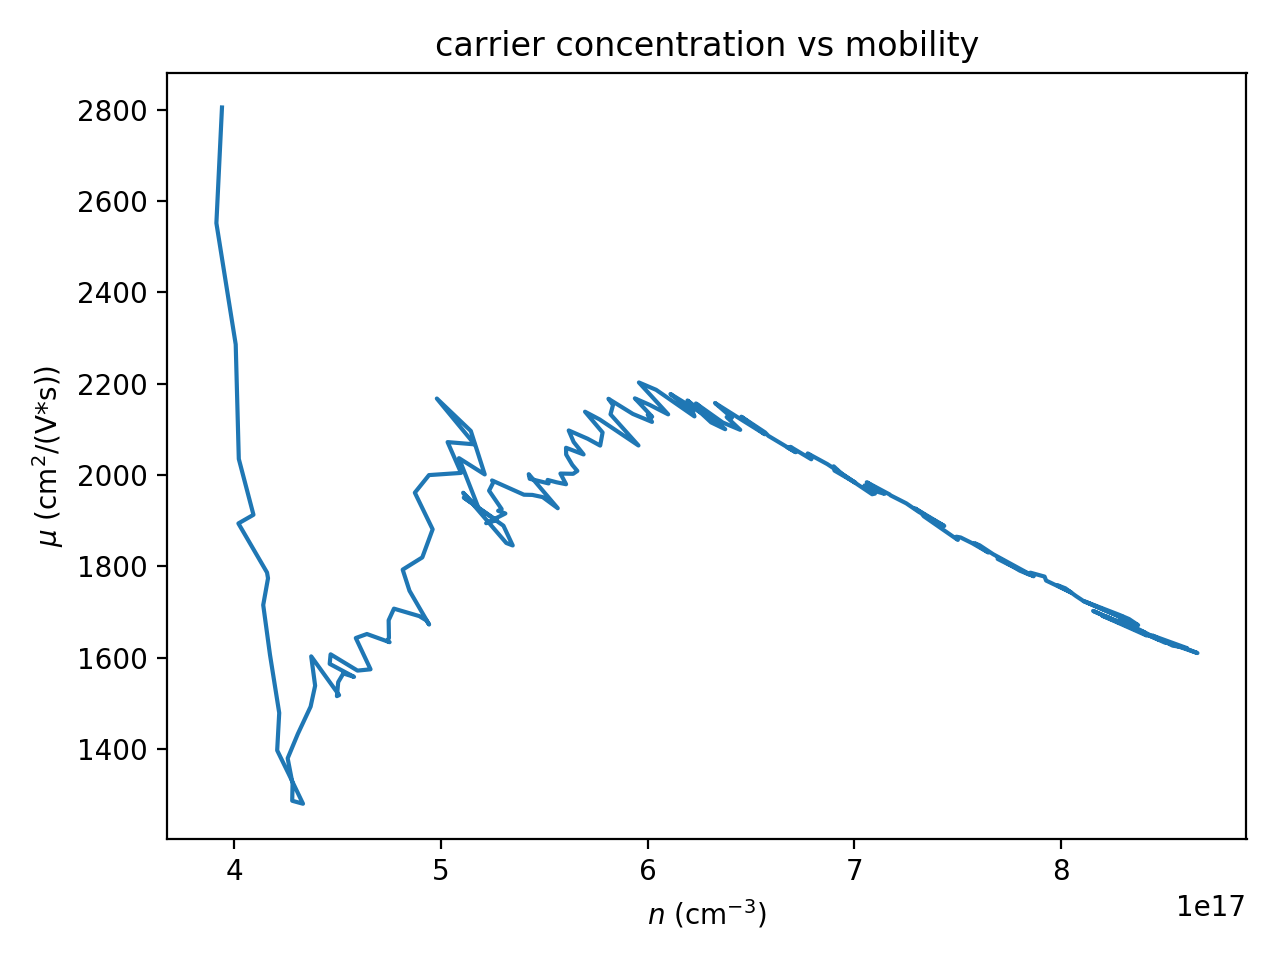

Text(0.5,1,'carrier concentration vs mobility')

In [19]:
plt.figure(num=9)
plt.plot(concentration, mu) # 1e-6 converts units from m^3 to cm^3
plt.xlabel('$n$ (cm$^{-3}$)')
plt.ylabel('$\mu$ (cm$^2$/(V*s))')
plt.title('carrier concentration vs mobility')
#plt.savefig('H6 concentration.pdf', format='pdf')

<IPython.core.display.Javascript object>


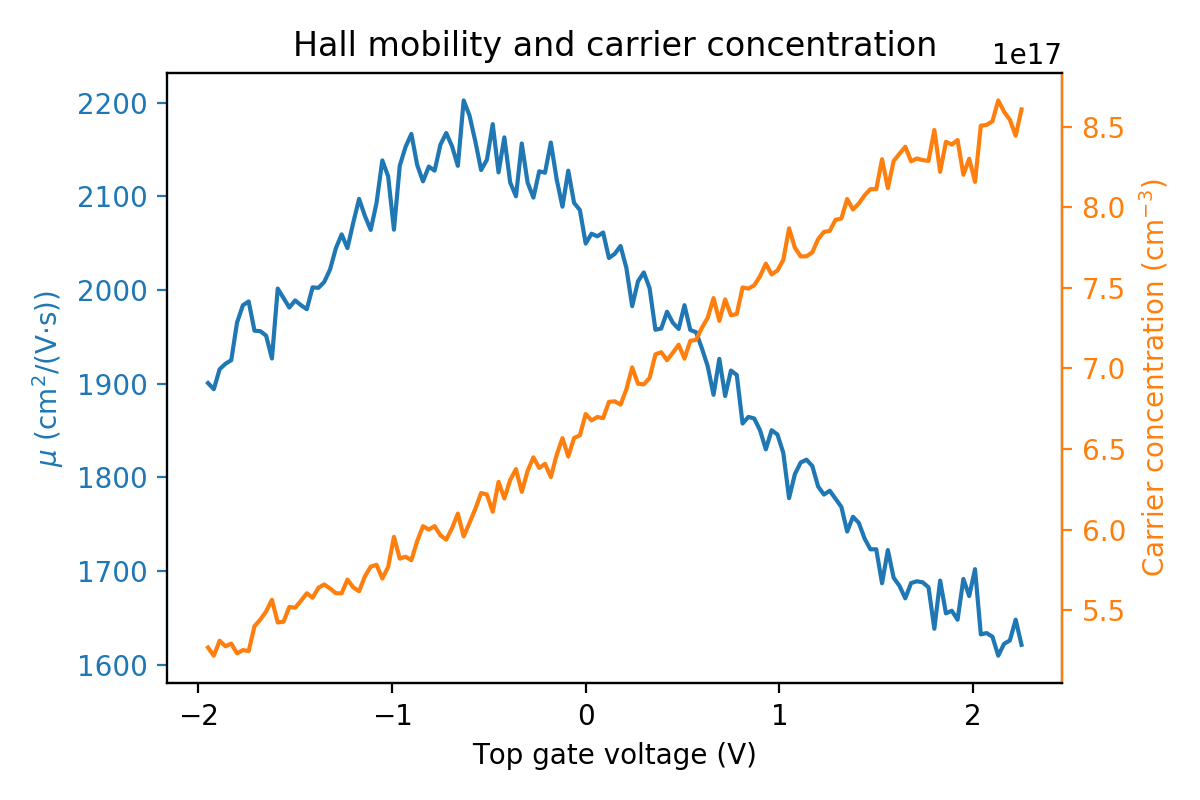

In [24]:
cut_neg_gates = 60 # number of columns of gate values to cut from the plots, 1 = no cutting
plt.rcParams.update({'figure.autolayout': True}) # make sure enough space is left at the boundaries to display all labels
fig_mob_conc = plt.figure(num=10, figsize=(6,4))
ax_mob_left = fig_mob_conc.add_subplot(111)
(ax_mob_left, ax_conc_right) = doubleYAxisPlot(axLeft=ax_mob_left, \
                                   x=TG_Ycoord[:-cut_neg_gates], yLeft=mu[:-cut_neg_gates], yRight=concentration[:-cut_neg_gates], \
                                   xLabel='Top gate voltage (V)', \
                                   yLabelLeft='$\mu$ (cm$^2$/(V$\cdot$s))',\
                                   yLabelRight='Carrier concentration (cm$^{-3}$)')
ax_mob_left.set_title('Hall mobility and carrier concentration')
fig_mob.savefig('H6 Hall mob and conc.pdf', format='pdf')